Capstone 2 Fake account predictor

A publicly available dataset (on Kaggle) was used. It has 65325, user accounts identified as fake or not fake. The data will be analyzed and a model will be created. The model will allow us to predict is an account is fake or real. 

The two values classifier was used:
2-class User classes : r (real/authentic user), f (fake user / bought followers)

Instagram:
https://www.kaggle.com/krpurba/fakeauthentic-user-instagram?select=user_fake_authentic_4class.csv


reference : 
K. R. Purba, D. Asirvatham and R. K. Murugesan, "Classification of instagram fake users using supervised machine learning algorithms," International Journal of Electrical and Computer Engineering (IJECE), vol. 10, no. 3, pp. 2763-2772, 2020.
The dataset was collected using web scraping from third-party Instagram websites, to capture their metadata and up to 12 latest media posts from each user. The collection process was executed from September 1st, 2019, until September 20th, 2019. The dataset contains authentic users and fake users, which were filtered using human annotators.
The authentic users were taken from followers of 24 private university pages (8 Indonesian, 8 Malaysian, 8 Australian) on Instagram. To reduce the number of users, they are picked using proportional random sampling based on their source university. All private users were removed, which is a total of 31,335 out of 63,795 users (49.11%). The final number of public users used in this research was 32,460 users.

There are two files avalible one with 2 classes and another one with 4 :
2-class User classes : r (real/authentic user), f (fake user / bought followers)
4-class User classes : r (authentic/real user), a (active fake user), i (inactive fake user), s (spammer fake user)


In [156]:
#Imported libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import ssl
#from library.sb_utils import save_file

In [18]:
# Reading a scv file:
account_file=pd.read_csv('../Springboard/user_fake_authentic_2class.csv')
print(account_file.head())

   pos  flw  flg   bl  pic  lin   cl   cz   ni    erl   erc     lt   hc   pr  \
0   44   48  325   33    1    0   12  0.0  0.0   0.00  0.00  0.000  0.0  0.0   
1   10   66  321  150    1    0  213  0.0  1.0  14.39  1.97  0.000  1.5  0.0   
2   33  970  308  101    1    1  436  0.0  1.0  10.10  0.30  0.000  2.5  0.0   
3   70   86  360   14    1    0    0  1.0  0.0   0.78  0.06  0.000  0.0  0.0   
4    3   21  285   73    1    0   93  0.0  0.0  14.29  0.00  0.667  0.0  0.0   

      fo        cs          pi class  
0  0.000  0.111111    0.094985     f  
1  0.000  0.206826  230.412857     f  
2  0.056  0.572174   43.569939     f  
3  0.000  1.000000    5.859799     f  
4  0.000  0.300494    0.126019     f  


In [19]:
account_file.columns
account_file.rename(columns={'pos':'posts', 'bl': 'bio_len','lin':'link', 'cl':'caption_len_avg', 'cz':'cap_zero_per','ni': 'no_image_per', 'erl': 'likes_rate', 'erc':'comment_rate','lt':'loc_tag','hc':'hash_count','fo':"fo_keyword_avg", 'cs':'cosine_sim_avg', 'pi':'post_interval'}, inplace=True)

In [20]:
account_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posts            65326 non-null  int64  
 1   flw              65326 non-null  int64  
 2   flg              65326 non-null  int64  
 3   bio_len          65326 non-null  int64  
 4   pic              65326 non-null  int64  
 5   link             65326 non-null  int64  
 6   caption_len_avg  65326 non-null  int64  
 7   cap_zero_per     65326 non-null  float64
 8   no_image_per     65326 non-null  float64
 9   likes_rate       65326 non-null  float64
 10  comment_rate     65326 non-null  float64
 11  loc_tag          65326 non-null  float64
 12  hash_count       65326 non-null  float64
 13  pr               65326 non-null  float64
 14  fo_keyword_avg   65326 non-null  float64
 15  cosine_sim_avg   65326 non-null  float64
 16  post_interval    65326 non-null  float64
 17  class       

In [21]:
missing=account_file.isnull().sum()

#missing = pd.concat([account_file.isnull().sum(), 100 * account_file.isnull().mean()], axis=1)
#missing.columns=['count', '%']
#missing.sort_values(by="%", ascending=False)

print(missing)

posts              0
flw                0
flg                0
bio_len            0
pic                0
link               0
caption_len_avg    0
cap_zero_per       0
no_image_per       0
likes_rate         0
comment_rate       0
loc_tag            0
hash_count         0
pr                 0
fo_keyword_avg     0
cosine_sim_avg     0
post_interval      0
class              0
dtype: int64


In [22]:
print(account_file.describe())

              posts           flw           flg       bio_len           pic  \
count  65326.000000  6.532600e+04  65326.000000  65326.000000  65326.000000   
mean     176.571227  1.183077e+03   2310.519211     57.497061      0.951765   
std      723.470655  2.170802e+04   2592.096104     64.129260      0.214264   
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%        6.000000  1.230000e+02    394.000000      0.000000      1.000000   
50%       30.000000  3.380000e+02    995.000000     32.000000      1.000000   
75%      124.000000  8.170000e+02   3600.000000    110.000000      1.000000   
max    76200.000000  3.900000e+06   8800.000000    555.000000      1.000000   

               link  caption_len_avg  cap_zero_per  no_image_per  \
count  65326.000000     65326.000000  65326.000000  65326.000000   
mean       0.281925       136.520344      0.250012      0.193229   
std        0.449940       215.714486      0.337891      0.252939   
min        0.000

There are some columns that we have take a closer look at their distribution and values.
Dichotomous values were assined to columns: pic, link

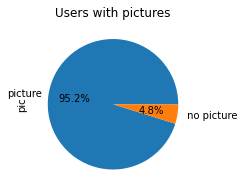

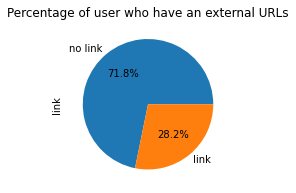

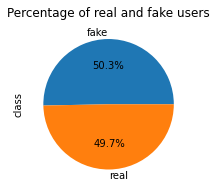

In [23]:
#print(account_file.pic.value_counts())
account_file.pic.value_counts().plot(kind="pie", labels=["picture", " no picture"], figsize=(3,3), autopct='%1.1f%%')
plt.title("Users with pictures")
#plt.legend()
plt.show()
#print(account_file.link.value_counts())
account_file.link.value_counts().plot(kind="pie", labels=["no link", "link"], figsize=(3,3), autopct='%1.1f%%')
plt.title("Percentage of user who have an external URLs")
plt.show()
account_file['class'].value_counts().plot(kind="pie", labels=["fake", "real"], figsize=(3,3), autopct='%1.1f%%')
plt.title("Percentage of real and fake users")
plt.show()

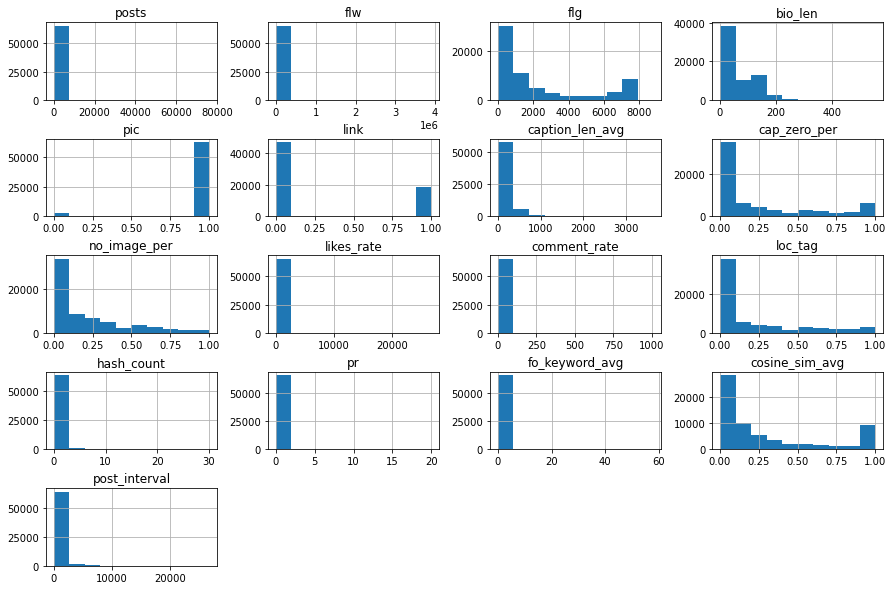

In [24]:
account_file.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [25]:
# using promotional keywords('pr') showed low numbers, this is because 89% of the values were 0.
pr_view = pd.concat([account_file.pr.value_counts(), 100 * account_file.pr.value_counts()/len(account_file.pr)], axis=1)
pr_view.columns=['count', '%']
pr_view=pr_view.sort_values(by="%", ascending=False)
print(pr_view)

        count          %
0.000   58761  89.950403
0.056    2092   3.202400
0.111     794   1.215443
0.167     386   0.590883
0.222     299   0.457704
...       ...        ...
20.000      1   0.001531
1.700       1   0.001531
1.357       1   0.001531
18.000      1   0.001531
3.750       1   0.001531

[199 rows x 2 columns]


In [26]:
#folowing related keywords avarage use showed low numbers, this is because 84% of the values were 0.
var_view = pd.concat([account_file.fo_keyword_avg.value_counts(), 100 * account_file.fo_keyword_avg.value_counts()/len(account_file.fo_keyword_avg)], axis=1)
var_view.columns=['count', '%']
var_view=var_view.sort_values(by="%", ascending=False)
print(var_view)

       count          %
0.000  54914  84.061476
0.056   4175   6.391023
0.111   1770   2.709488
0.167    734   1.123596
0.222    410   0.627621
...      ...        ...
0.238      1   0.001531
0.769      1   0.001531
6.667      1   0.001531
3.611      1   0.001531
3.571      1   0.001531

[304 rows x 2 columns]


In [159]:
bio_view = pd.concat([account_file['bio_len'].value_counts(), 100 * account_file['bio_len'].value_counts()/len(account_file['bio_len'])], axis=1)
bio_view.columns=['count', '%']
bio_view=pr_view.sort_values(by="%", ascending=False)
print(bio_view)
# Almost 90% of the values are 0.

       count          %
0.000  58761  89.950403
0.056   2092   3.202400
0.111    794   1.215443
0.167    386   0.590883
0.222    299   0.457704
...      ...        ...
2.429      1   0.001531
1.786      1   0.001531
0.647      1   0.001531
0.368      1   0.001531
3.750      1   0.001531

[199 rows x 2 columns]


In [27]:
# The column of how many folowers a user has was very skewed , the max was unusually high. 
#Some of the higher values are real accounts and some are not.

account_file.flw.value_counts()
print(account_file.flw.max())

per_nn_flw=account_file.flw.quantile(0.99)

print(per_nn_flw)

high_flw=account_file.loc[account_file.flw>per_nn_flw ]
print(high_flw[['flw', 'class']])

3900000
10600.0
         flw class
8      23700     f
10     11300     f
64     12700     f
91     17500     f
179    16300     f
...      ...   ...
65036  30100     r
65085  11500     r
65107  18700     r
65108  52800     r
65136  22900     r

[648 rows x 2 columns]


<AxesSubplot:>

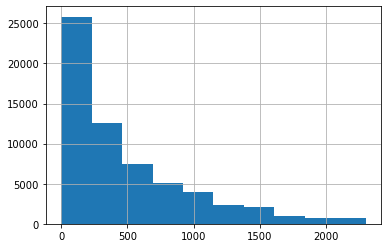

In [28]:
q=account_file.flw.quantile(0.95)

flw_b=account_file.flw[account_file.flw<q]
flw_b.count()
flw_b.hist()


In [29]:
# caption_len_avg,the captions avarage length column have a negative min value. This cannot be possible, there is a mistake in the data. 
# this feature's values have to be checked

freq=account_file.caption_len_avg.value_counts()
sorted_freq=freq.sort_values()
#account_file.caption_len_avg.()

account_file.caption_len_avg.min()
negative=account_file.caption_len_avg<0
print(account_file.caption_len_avg[negative].sum())

-162


In [30]:
# There 162 values -1, we can refer to these as missing values.
account_file.caption_len_avg[negative].value_counts()

-1    162
Name: caption_len_avg, dtype: int64

In [31]:
# likes_rate feature is also very skewed. It has 75 percentile of 18 and 26650.
# There is a need to check for outliers and see if these are incorrect values.
per_nn=account_file.likes_rate.quantile(0.99)
outl=account_file.likes_rate> per_nn
outl_sorted=account_file.likes_rate[outl].sort_values()
print(outl_sorted[outl_sorted >5000].count())
print(outl_sorted[outl_sorted >6000].count())
#outl_sorted.value_counts().sum()

#only 3 people had more than 5000 ranks
#only 1 person more than 6000 which was 26650 an unexpectedly high and can be a mistake or a fake account. 
#The high value can still be a problem since other fake accounts didn't have sucha high proportion of "likes".
# Since this is engagemnet rate num likes divided by num media divide by num followers can be unusual?

3
1


In [32]:
high_likes=account_file.loc[account_file.likes_rate> 5000]
#print(high_likes)

high_likes_class=high_likes['class']
print(high_likes_class)

#The outliers are all fake accounts

24868    f
25335    f
27647    f
Name: class, dtype: object


In [33]:
# Similarily there is a need to check the column "comment_rate"

per_nn_cr=account_file.comment_rate.quantile(0.99)
print(per_nn_cr)
outl_cr=account_file.comment_rate> per_nn_cr
print(account_file.comment_rate[outl_cr].sort_values())
print(account_file.comment_rate[ account_file.comment_rate>400].count())

# only one was unusually high , higher than 400. 1009.1

11.93999958
37292      11.950000
29648      11.950000
38733      11.960000
12932      12.000000
64709      12.000000
            ...     
14258     283.329987
24868     300.000000
21909     344.130005
27647     400.000000
32690    1009.090027
Name: comment_rate, Length: 653, dtype: float64
1


In [34]:
#hash_count was checked as well. It looks like 99% were under 4.43. The rest are part of the distribution no unusual values.

per_nn_hc=account_file.hash_count.quantile(0.99)
print(per_nn_hc)
outl_hc=account_file.hash_count> per_nn_hc
print(account_file.hash_count[outl_cr].sort_values())
print(account_file.hash_count[account_file.hash_count>25].count())

4.4289999008
363       0.0
39974     0.0
39868     0.0
39777     0.0
39613     0.0
         ... 
51025    19.0
57061    19.0
14295    21.5
19019    25.0
24237    29.0
Name: hash_count, Length: 653, dtype: float64
11


<AxesSubplot:>

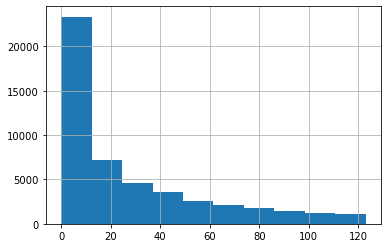

In [35]:
#account_file.posts.hist(bins=5)

#plt.hist(account_file['posts'],bins=5)

q_posts=account_file.posts.quantile(0.75)
q2_posts=account_file.posts.quantile(0.25)

posts_a=account_file.posts[account_file.posts<q_posts]
posts_a.hist()

<AxesSubplot:>

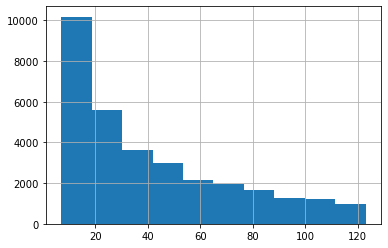

In [36]:
posts_b=posts_a[posts_a>q2_posts]
posts_b.count()
posts_b.hist()

In [37]:
# The target column has almost half fake and half real accounts.
account_file["class"].value_counts()

f    32866
r    32460
Name: class, dtype: int64

In [38]:
duplicated=account_file.duplicated(keep=False)
duplicated.sum()
account_file[duplicated]

,posts,flw,flg,bio_len,pic,link,caption_len_avg,cap_zero_per,no_image_per,likes_rate,comment_rate,loc_tag,hash_count,pr,fo_keyword_avg,cosine_sim_avg,post_interval,class
2524,0,30,149,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f
3584,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
4118,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
4165,0,30,149,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f
5714,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,0,0,0,0,0,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
32747,0,34,7500,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f
32748,0,77,7400,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f
32749,0,70,7300,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,f


In [39]:
account_file[['flg', 'caption_len_avg','class']][duplicated]


,flg,caption_len_avg,class
2524,149,0,f
3584,0,-1,f
4118,0,-1,f
4165,149,0,f
5714,0,0,f
...,...,...,...
32745,0,-1,f
32747,7500,0,f
32748,7400,0,f
32749,7300,0,f


In [40]:
print(account_file[duplicated]['class'].value_counts())
# All the identified duplicates are false accounts.

account_file[duplicated]['caption_len_avg'].value_counts()

f    1460
Name: class, dtype: int64


 0    1298
-1     162
Name: caption_len_avg, dtype: int64

In [41]:
account_file[duplicated][['flg', 'caption_len_avg','class']].sort_values(by='flg')

,flg,caption_len_avg,class
32764,0,-1,f
21604,0,-1,f
21661,0,0,f
21686,0,-1,f
21689,0,-1,f
...,...,...,...
29718,7500,0,f
31534,7500,0,f
29772,7500,0,f
32247,7500,0,f


In [42]:
#The 162 missing values were droped as they are a small proportion of data, have mostly duplicates and we will not loose  alot of information
account=account_file[~negative]
account.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65164 entries, 0 to 65325
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posts            65164 non-null  int64  
 1   flw              65164 non-null  int64  
 2   flg              65164 non-null  int64  
 3   bio_len          65164 non-null  int64  
 4   pic              65164 non-null  int64  
 5   link             65164 non-null  int64  
 6   caption_len_avg  65164 non-null  int64  
 7   cap_zero_per     65164 non-null  float64
 8   no_image_per     65164 non-null  float64
 9   likes_rate       65164 non-null  float64
 10  comment_rate     65164 non-null  float64
 11  loc_tag          65164 non-null  float64
 12  hash_count       65164 non-null  float64
 13  pr               65164 non-null  float64
 14  fo_keyword_avg   65164 non-null  float64
 15  cosine_sim_avg   65164 non-null  float64
 16  post_interval    65164 non-null  float64
 17  class       

In [43]:
#This is the non duplicates dataframe. 
account_nodup=account.drop_duplicates(keep='first')
account_nodup.head()

,posts,flw,flg,bio_len,pic,link,caption_len_avg,cap_zero_per,no_image_per,likes_rate,comment_rate,loc_tag,hash_count,pr,fo_keyword_avg,cosine_sim_avg,post_interval,class
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,f


In [160]:
#The columns with 84 % and 89% 0 values will be droped. 
account_clean=account_nodup.drop(["pr","fo_keyword_avg",'bio_len'], axis=1)
account_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64243 entries, 0 to 65325
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posts            64243 non-null  int64  
 1   flw              64243 non-null  int64  
 2   flg              64243 non-null  int64  
 3   pic              64243 non-null  int64  
 4   link             64243 non-null  int64  
 5   caption_len_avg  64243 non-null  int64  
 6   cap_zero_per     64243 non-null  float64
 7   no_image_per     64243 non-null  float64
 8   likes_rate       64243 non-null  float64
 9   comment_rate     64243 non-null  float64
 10  loc_tag          64243 non-null  float64
 11  hash_count       64243 non-null  float64
 12  cosine_sim_avg   64243 non-null  float64
 13  post_interval    64243 non-null  float64
 14  class            64243 non-null  object 
dtypes: float64(8), int64(6), object(1)
memory usage: 7.8+ MB


In [161]:
account_clean.head()

,posts,flw,flg,pic,link,caption_len_avg,cap_zero_per,no_image_per,likes_rate,comment_rate,loc_tag,hash_count,cosine_sim_avg,post_interval,class
0,44,48,325,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.111111,0.094985,f
1,10,66,321,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.206826,230.412857,f
2,33,970,308,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.572174,43.569939,f
3,70,86,360,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,1.000000,5.859799,f
4,3,21,285,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.300494,0.126019,f


0          44
1          10
2          33
3          70
4           3
         ... 
65321      13
65322     652
65323    1500
65324     329
65325     206
Name: posts, Length: 63587, dtype: int64


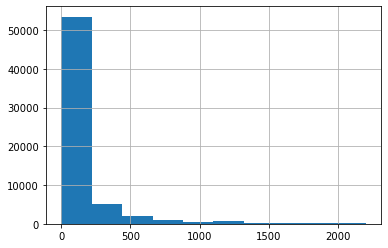

In [162]:
# Now I will systematicly check and trim the remaining features. I created a function that will trim outliers
# by excluding values above 99th perccentile and will plot a histogram. 


def trim(column, quantile):
    q=column.quantile(quantile)
    column_a=column[column<q]
    return column_a.value_counts(), column_a.hist(), column_a

count,hist, posts_a=trim(account_clean.posts, 0.99)

print(posts_a)
#print(account_clean.posts.value_counts())


0          48
1          66
2         970
3          86
4          21
         ... 
65321     145
65322    3000
65323    3700
65324    1500
65325     659
Name: flw, Length: 63595, dtype: int64


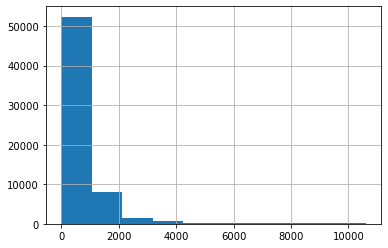

In [135]:
#print(account_clean.flw.value_counts())

x,y,flw_a=trim(account_clean.flw, 0.99)
print(flw_a)

0         325
1         321
2         308
3         360
4         285
         ... 
65321     642
65322    1300
65323    3200
65324    1800
65325     608
Name: flg, Length: 62071, dtype: int64


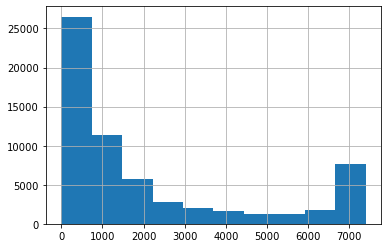

In [138]:
#print(account_clean.flg.value_counts())

count,hist, flg_a=trim(account_clean.flg, 0.99)

print(flg_a)

0         12
1        213
2        436
3          0
4         93
        ... 
65321      7
65322    384
65323    129
65324    290
65325     77
Name: caption_len_avg, Length: 63599, dtype: int64


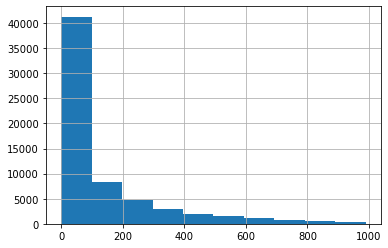

In [140]:
  #print(account_clean.caption_len_avg.value_counts())

count,hist, cap_a=trim(account_clean.caption_len_avg, 0.99)

print(cap_a)

0        0.000
1        1.500
2        2.500
3        0.000
4        0.000
         ...  
65321    0.077
65322    1.611
65323    0.000
65324    0.500
65325    0.222
Name: hash_count, Length: 63597, dtype: float64
45.56531855616447


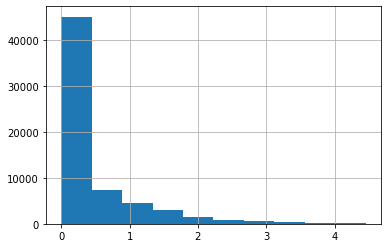

In [141]:

count,hist,hash_a=trim(account_clean.hash_count, 0.99)

print(hash_a)
    
print(29766*100/len(account_file.hash_count))

#This shows that qlmost 50% of the data has the value 0.

0     0.00
1    14.39
2    10.10
3     0.78
4    14.29
Name: likes_rate, dtype: float64


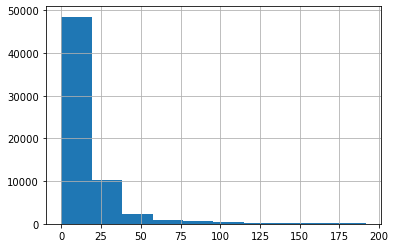

In [153]:

count,hist,likes_a=trim(account_clean.likes_rate, 0.99)

print(likes_a.head()) 
#print(count)

0    0.00
1    1.97
2    0.30
3    0.06
4    0.00
Name: comment_rate, dtype: float64


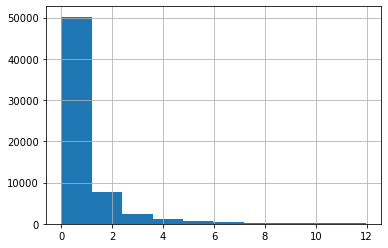

In [152]:

count,hist,comment_r_a=trim(account_clean.comment_rate, 0.99)

print(comment_r_a.head())
#print(count)

0     12
1    213
2    436
3      0
4     93
Name: caption_len_avg, dtype: int64
0      10142
3        759
2        727
1        720
7        671
       ...  
883        1
915        1
947        1
830        1
959        1
Name: caption_len_avg, Length: 983, dtype: int64


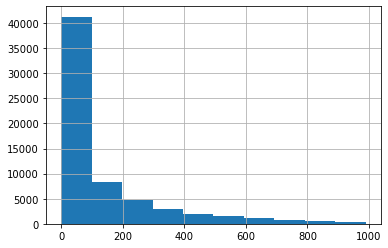

In [150]:

count,hist,cap_avg_a=trim(account_clean.caption_len_avg, 0.99)

print(cap_avg_a.head())
#print(count)

0      0.094985
1    230.412857
2     43.569939
3      5.859799
4      0.126019
Name: post_interval, dtype: float64


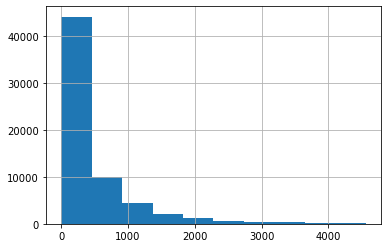

In [154]:
count,hist,post_interval_a=trim(account_clean.post_interval, 0.99)

print(post_interval_a.head())

In [163]:
# The clean data will be saved to a new file. The new columns will be used in the next notebook. 

account_clean.to_csv('../accounts_data_cleaned.csv')

In [ ]:
#q_account=account_file.quantile(0.75)
#account=account_file[account_file>account_file.quantile(0.75)]
#account.hist(figsize=(15, 10))
#plt.subplots_adjust(hspace=0.5);
